1-1.빅데이터의 3v에 대해 설명하시오

3v를 특징으로 하는 데이터
3v
거대한 규모:방대한 양의 데이터(테라,테라바이트 이상)
빠른 속도:실시간 생성,빠른 속도로 데이터를 처리 / 분석
높은 다양성: 정형(DBMS)및 비정형(영상, 음성, 텍스트 SNS등)

기존의 데이터 베이스 관리 도구, 관리 시스템의 능력을 넘어 정형, 비정형 데이터세트,이를 포함한 데이터로부터 분석하여 의미 있는 가치를 추출하고 결과를 분석하는 기술

1-2 정형데이터와 비정형 데이터에 대해 설명하시오

정형 데이터란 일정한 형식이나 규칙에 맞게 저장된 데이터, 정형 데이터 예: 스프레드시트,관계형 데이터 베이스 CSV 등이다

비정형 데이터란 정해진 규칙이 없어서 값의 의미를 쉽게 파악하기 힘든 데이터들로 SNS,텍스트, 음성, 영상 등이 포함된다

1-3 빅데이터 처리 과정에 대해 설명하시오

데이터 소스 - 수집 - 저장 - 처리 - 분석 - 표현순으로 처리하며
데이터소스에는 내부 데이터,외부 데이터,미디어가 있고 수집에는 수동,자동이 있고, 저장에는 정형과 비정혛, 데이터 등급이 있고 처리에는 일과 처리, 실시간 & 배치 분산 병렬 처리가 있고 분석에는 전처리와 분석 방법을 보여주어 마지막 표현으로 처리되는 것이다.

1-4 빅데이터의 활용 사레를 2가지 이상 설명하시오

1. 당근마켓
- 게시한 사진의 상품 카테고리 자동 분류, 맞춤형 콘텐츠 추천해준다
2. 넷플릭스
- 사용자의 영화 관람 목록에 기초해 새로운 영화를 추천해주는 시스템 개발
3.신용카드사
-빅데이터 분석을 통해 파악한 고객 니즈와 스마트폰으로부터 수집한 정보를 결합하는 CLO(Card Linked Offer)서비스를 마케팅에 활용

In [18]:
# 2-1 다음과 같은 표의 내용을 데이터 프레임으로 만들고 출력하시오

import pandas as pd

df = pd.DataFrame({
    'index': [0, 1, 2, 3, 4],
    'id': ['applecarrot', 'sweetsoju', 'chimaek', 'galbiya', 'kimchijeon'],  
    'grade': ['1st', '1st', '3rd', '3rd', '2nd'], 
    'admin': [True, False, False, True, False]
})

print(df)






   index           id grade  admin
0      0  applecarrot   1st   True
1      1    sweetsoju   1st  False
2      2      chimaek   3rd  False
3      3      galbiya   3rd   True
4      4   kimchijeon   2nd  False


In [15]:
# 2-2 kdrama_test.xlxs 데이터에서 2020년 이후로 넷플릭스에서 단독으로 출시된 드라마들의 연도별 편균 평점을 구하고 출력하시오

import pandas as pd


df = pd.read_excel('kdrama_test.xlsx')

#  열을 날짜 형식으로 변환
df['AiredDate'] = pd.to_datetime(df['AiredDate'], errors='coerce')  # 수정된 부분

# 2020년 이후, 넷플릭스에서 단독 출시된 드라마들을 필터링
filtered_df = df[(df['AiredDate'].dt.year >= 2020) & (df['OriginalNetwork'] == 'Netflix')]  # 수정된 부분

# 연도별 평균 평점을 계산합
average_ratings = filtered_df.groupby(filtered_df['AiredDate'].dt.year)['Rating'].mean()  # 수정된 부분

# 결과를 출력합니다.
print(average_ratings)



AiredDate
2020    8.700
2021    8.800
2022    8.425
Name: Rating, dtype: float64


In [14]:
# 2-3kdrama_test.xlxs 데이터에서 에피소드가 30개 이상인 드라마들의 관람 연령별 드라마 개수를 구하고 출력하시오
import pandas as pd

df = pd.read_excel('kdrama_test.xlsx')

# 에피소드가 30개 이상인 드라마들을 필터링
filtered_df = df[df['NumberOfEpisodes'] >= 30]

# 관람 연령별 드라마 개수를 구합니다.
age_rating_counts = filtered_df['ContentRating'].value_counts()


print(age_rating_counts)



ContentRating
15+ - Teens 15 or older    30
13+ - Teens 13 or older     2
Name: count, dtype: int64


In [11]:
# 2-4kdrama_test.xlxs 데이터의 각 변수에 몇 개의 결측지가 있는지 확인하고,결측지가 존재하는 행을 모두 제거한 데이터 프레임을 만들어 출력하시오
import pandas as pd


df = pd.read_excel('kdrama_test.xlsx')

# 각 변수에 있는 결측값의 개수 확인
missing_values = df.isnull().sum()


df_cleaned = df.dropna()

# 결과를 출력
print("각 변수의 결측값 개수:")
print(missing_values)
print("\n결측값이 제거된 데이터프레임:")
print(df_cleaned)


각 변수의 결측값 개수:
Name                   0
AiredDate              0
YearOfRelease          0
OriginalNetwork        0
AiredOn                0
NumberOfEpisodes       0
Duration               0
ContentRating          5
Rating                 0
Synopsis               0
Genre                  0
Tags                   0
Director               1
Screenwriter           1
Cast                   0
ProductionCompanies    2
Rank                   0
dtype: int64

결측값이 제거된 데이터프레임:
                       Name                    AiredDate  YearOfRelease  \
0            Move to Heaven          2021-05-14 00:00:00           2021   
1            Flower of Evil  Jul 29, 2020 - Sep 23, 2020           2020   
2         Hospital Playlist  Mar 12, 2020 - May 28, 2020           2020   
3       Hospital Playlist 2  Jun 17, 2021 - Sep 16, 2021           2021   
4                 My Mister  Mar 21, 2018 - May 17, 2018           2018   
..                      ...                          ...            ...   
245  

ContentRating
15+ - Teens 15 or older    30
13+ - Teens 13 or older     2
Name: count, dtype: int64


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pac

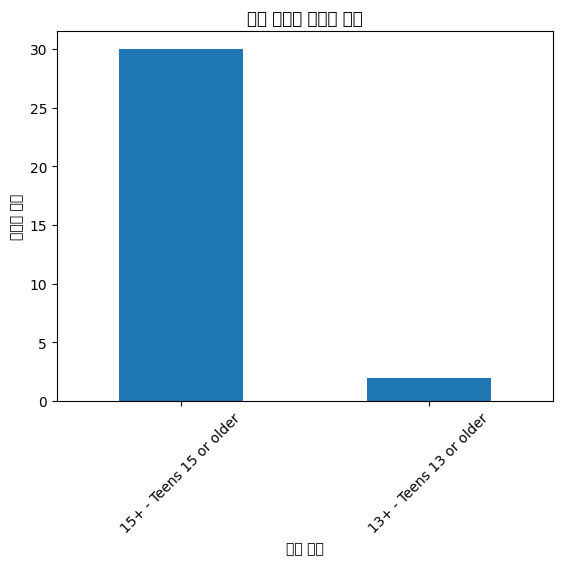

In [12]:
# 보너스 문제 kdrama_test.xlsx 데이터 혹은 인터넷에서 구할 수 있는 다른 데이터셋을 이용해 자유롭게 의미 있는 결과를 추출하고 설명하시오

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel('kdrama_test.xlsx')

# 'NumberOfEpisodes'가 30개 이상인 드라마들을 필터링
filtered_df = df[df['NumberOfEpisodes'] >= 30]

# 관람 연령별 드라마 개수를 구함
age_rating_counts = filtered_df['ContentRating'].value_counts()


print(age_rating_counts)

# 시각화
age_rating_counts.plot(kind='bar', rot=45)
plt.xlabel('관람 연령')
plt.ylabel('드라마 개수')
plt.title('관람 연령별 드라마 개수')
plt.show()

